In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

In [102]:
file = "Eurostat.xls"
df_eurostat = pd.read_excel(file, skiprows=11, index_col=0)

In [105]:
def cleanData(df):
    df = df.T
    df = df.replace(":", np.NaN)
    df = df.rename(columns = {' Former Yugoslav Republic of Macedonia, the':'North Macedonia'})
    df = df.rename(columns = {'Germany (until 1990 former territory of the FRG)':'Germany'})
    df.columns.name = 'Countries'
    return df

In [110]:
df_cleaned = cleanData(df_eurostat)
df_cleaned

Countries,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Montenegro,"Former Yugoslav Republic of Macedonia, the",Turkey
2,8.1,10.0,7.1,7.5,7.0,18.3,14.6,12.0,19.9,8.6,...,14.4,9.6,9.5,7.7,8.8,3.8,4.7,NaN,32.1,9.9
3,8.7,9.6,7.1,7.3,6.6,15.4,14.9,12.6,19.6,8.3,...,14.1,7.3,8.0,7.9,6.5,3.4,5.0,NaN,31.7,10.2
4,7.9,11.4,6.9,7.3,6.4,13.6,15.1,14.5,20.1,9.1,...,13.9,7.4,7.6,7.7,7.4,3.2,4.3,NaN,31.0,9.8
5,7.2,12.2,7.2,8.1,6.6,14.3,15.0,16.1,21.1,9.2,...,14.0,8.6,8.3,7.7,7.8,3.2,4.7,21.2,31.2,10.4
6,6.6,11.2,6.7,7.3,5.8,13.0,15.3,16.5,20.7,8.4,...,13.2,8.8,8.6,7.8,8.4,3.5,3.9,19.9,31.4,8.6
7,7.8,10.3,6.5,7.5,5.7,10.7,15.9,18.0,21.3,8.3,...,13.2,6.8,7.1,8.5,5.9,3.1,4.6,19.5,31.2,8.3
8,7.1,11.4,6.4,7.4,5.3,11.3,15.3,21.0,22.6,9.3,...,14.1,6.9,7.2,8.2,6.0,3.0,4.4,18.1,31.8,8.1
9,7.2,12.9,7.1,8.1,5.8,11.3,15.8,22.9,24.2,9.6,...,14.1,8.0,8.2,8.2,6.9,3.2,4.6,20.8,31.6,9.4
10,7.0,12.3,6.7,7.8,5.3,10.1,15.9,23.8,24.4,9.0,...,13.6,8.6,8.6,7.8,7.3,3.2,4.1,20.0,31.3,7.3
11,7.7,11.5,7.0,7.4,5.3,9.5,15.9,25.0,24.8,8.9,...,13.7,7.1,7.5,8.0,5.0,3.0,4.7,18.6,30.7,7.8


In [111]:
UnemploymentRate = df_eurostat.T
UnemploymentRate = UnemploymentRate.replace(":", np.NaN)

In [112]:
UnemploymentRate = UnemploymentRate.rename(columns = {' Former Yugoslav Republic of Macedonia, the':'North Macedonia'})
UnemploymentRate = UnemploymentRate.rename(columns = {'Germany (until 1990 former territory of the FRG)':'Germany'})

In [113]:
UnemploymentRate.columns.name = 'Countries'
UnemploymentRate

Countries,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Montenegro,"Former Yugoslav Republic of Macedonia, the",Turkey
2,8.1,10.0,7.1,7.5,7.0,18.3,14.6,12.0,19.9,8.6,...,14.4,9.6,9.5,7.7,8.8,3.8,4.7,NaN,32.1,9.9
3,8.7,9.6,7.1,7.3,6.6,15.4,14.9,12.6,19.6,8.3,...,14.1,7.3,8.0,7.9,6.5,3.4,5.0,NaN,31.7,10.2
4,7.9,11.4,6.9,7.3,6.4,13.6,15.1,14.5,20.1,9.1,...,13.9,7.4,7.6,7.7,7.4,3.2,4.3,NaN,31.0,9.8
5,7.2,12.2,7.2,8.1,6.6,14.3,15.0,16.1,21.1,9.2,...,14.0,8.6,8.3,7.7,7.8,3.2,4.7,21.2,31.2,10.4
6,6.6,11.2,6.7,7.3,5.8,13.0,15.3,16.5,20.7,8.4,...,13.2,8.8,8.6,7.8,8.4,3.5,3.9,19.9,31.4,8.6
7,7.8,10.3,6.5,7.5,5.7,10.7,15.9,18.0,21.3,8.3,...,13.2,6.8,7.1,8.5,5.9,3.1,4.6,19.5,31.2,8.3
8,7.1,11.4,6.4,7.4,5.3,11.3,15.3,21.0,22.6,9.3,...,14.1,6.9,7.2,8.2,6.0,3.0,4.4,18.1,31.8,8.1
9,7.2,12.9,7.1,8.1,5.8,11.3,15.8,22.9,24.2,9.6,...,14.1,8.0,8.2,8.2,6.9,3.2,4.6,20.8,31.6,9.4
10,7.0,12.3,6.7,7.8,5.3,10.1,15.9,23.8,24.4,9.0,...,13.6,8.6,8.6,7.8,7.3,3.2,4.1,20.0,31.3,7.3
11,7.7,11.5,7.0,7.4,5.3,9.5,15.9,25.0,24.8,8.9,...,13.7,7.1,7.5,8.0,5.0,3.0,4.7,18.6,30.7,7.8


In [120]:
UnemploymentRate.index
dates = pd.period_range(start="2010Q2",end="2017Q4", freq="Q", name="Quarterly")
UnemploymentRate.index = dates
UnemploymentRate

Countries,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Montenegro,"Former Yugoslav Republic of Macedonia, the",Turkey
Quarterly,,,,,,,,,,,,,,,,,,,,,
2010Q2,8.1,10.0,7.1,7.5,7.0,18.3,14.6,12.0,19.9,8.6,...,14.4,9.6,9.5,7.7,8.8,3.8,4.7,NaN,32.1,9.9
2010Q3,8.7,9.6,7.1,7.3,6.6,15.4,14.9,12.6,19.6,8.3,...,14.1,7.3,8.0,7.9,6.5,3.4,5.0,NaN,31.7,10.2
2010Q4,7.9,11.4,6.9,7.3,6.4,13.6,15.1,14.5,20.1,9.1,...,13.9,7.4,7.6,7.7,7.4,3.2,4.3,NaN,31.0,9.8
2011Q1,7.2,12.2,7.2,8.1,6.6,14.3,15.0,16.1,21.1,9.2,...,14.0,8.6,8.3,7.7,7.8,3.2,4.7,21.2,31.2,10.4
2011Q2,6.6,11.2,6.7,7.3,5.8,13.0,15.3,16.5,20.7,8.4,...,13.2,8.8,8.6,7.8,8.4,3.5,3.9,19.9,31.4,8.6
2011Q3,7.8,10.3,6.5,7.5,5.7,10.7,15.9,18.0,21.3,8.3,...,13.2,6.8,7.1,8.5,5.9,3.1,4.6,19.5,31.2,8.3
2011Q4,7.1,11.4,6.4,7.4,5.3,11.3,15.3,21.0,22.6,9.3,...,14.1,6.9,7.2,8.2,6.0,3.0,4.4,18.1,31.8,8.1
2012Q1,7.2,12.9,7.1,8.1,5.8,11.3,15.8,22.9,24.2,9.6,...,14.1,8.0,8.2,8.2,6.9,3.2,4.6,20.8,31.6,9.4
2012Q2,7.0,12.3,6.7,7.8,5.3,10.1,15.9,23.8,24.4,9.0,...,13.6,8.6,8.6,7.8,7.3,3.2,4.1,20.0,31.3,7.3


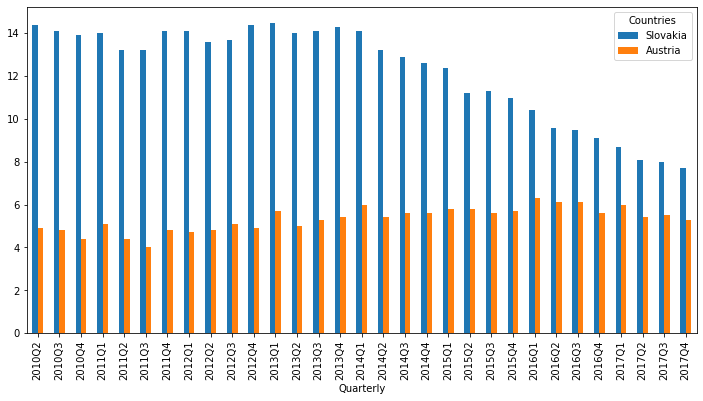

In [167]:
plt.rcParams['figure.figsize'] = [12.0,6.0] # Modifies the defult size of plots [6.0,4.0] inches
UnemploymentRate[['Slovakia','Austria']].plot(kind="bar",legend=True)
plt.show()